In [1]:
#Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import metrics
from sklearn.metrics import mean_squared_error 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

%matplotlib inline

# Train Data

In [3]:
#Final Features

"LotFrontage","GarageQual","MasVnrArea","Electrical","Id","LotArea","OverallQual","TotalBsmtSF","GrLivArea","BsmtFullBath","FullBath","Fireplaces","GarageCars","WoodDeckSF","OpenPorchSF","EnclosedPorch","3SsnPorch","ScreenPorch","PoolArea","SalePrice","MSZoning","LotShape","Neighborhood","HouseStyle","RoofMatl","Exterior1st","Exterior2nd","ExterQual","Foundation","SaleCondition","SaleType","Heating","CentralAir","KitchenQual"

('LotFrontage',
 'GarageQual',
 'MasVnrArea',
 'Electrical',
 'Id',
 'LotArea',
 'OverallQual',
 'TotalBsmtSF',
 'GrLivArea',
 'BsmtFullBath',
 'FullBath',
 'Fireplaces',
 'GarageCars',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'SalePrice',
 'MSZoning',
 'LotShape',
 'Neighborhood',
 'HouseStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'ExterQual',
 'Foundation',
 'SaleCondition',
 'SaleType',
 'Heating',
 'CentralAir',
 'KitchenQual')

In [4]:
#Create Train Dataframe
col_list = ["LotFrontage","GarageQual","MasVnrArea","Electrical","Id","LotArea","OverallQual","TotalBsmtSF","GrLivArea","BsmtFullBath","FullBath","Fireplaces","GarageCars","WoodDeckSF","OpenPorchSF","EnclosedPorch","3SsnPorch","ScreenPorch","PoolArea","SalePrice","MSZoning","LotShape","Neighborhood","HouseStyle","RoofMatl","Exterior1st","Exterior2nd","ExterQual","Foundation","SaleCondition","SaleType","Heating","CentralAir","KitchenQual"]
missing_values = ["n/a", "na", "--", "nan"]
train = pd.read_csv('train.csv', usecols=col_list,low_memory=False, delimiter =',', na_values = missing_values)

In [5]:
#Train table
train

,Id,MSZoning,LotFrontage,LotArea,LotShape,Neighborhood,HouseStyle,OverallQual,RoofMatl,Exterior1st,...,GarageQual,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,SaleType,SaleCondition,SalePrice
0,1,RL,65.0,8450,Reg,CollgCr,2Story,7,CompShg,VinylSd,...,TA,0,61,0,0,0,0,WD,Normal,208500
1,2,RL,80.0,9600,Reg,Veenker,1Story,6,CompShg,MetalSd,...,TA,298,0,0,0,0,0,WD,Normal,181500
2,3,RL,68.0,11250,IR1,CollgCr,2Story,7,CompShg,VinylSd,...,TA,0,42,0,0,0,0,WD,Normal,223500
3,4,RL,60.0,9550,IR1,Crawfor,2Story,7,CompShg,Wd Sdng,...,TA,0,35,272,0,0,0,WD,Abnorml,140000
4,5,RL,84.0,14260,IR1,NoRidge,2Story,8,CompShg,VinylSd,...,TA,192,84,0,0,0,0,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,RL,62.0,7917,Reg,Gilbert,2Story,6,CompShg,VinylSd,...,TA,0,40,0,0,0,0,WD,Normal,175000
1456,1457,RL,85.0,13175,Reg,NWAmes,1Story,6,CompShg,Plywood,...,TA,349,0,0,0,0,0,WD,Normal,210000
1457,1458,RL,66.0,9042,Reg,Crawfor,2Story,7,CompShg,CemntBd,...,TA,0,60,0,0,0,0,WD,Normal,266500
1458,1459,RL,68.0,9717,Reg,NAmes,1Story,5,CompShg,MetalSd,...,TA,366,0,112,0,0,0,WD,Normal,142125


In [6]:
#Train Info
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 34 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   LotShape       1460 non-null   object 
 5   Neighborhood   1460 non-null   object 
 6   HouseStyle     1460 non-null   object 
 7   OverallQual    1460 non-null   int64  
 8   RoofMatl       1460 non-null   object 
 9   Exterior1st    1460 non-null   object 
 10  Exterior2nd    1460 non-null   object 
 11  MasVnrArea     1452 non-null   float64
 12  ExterQual      1460 non-null   object 
 13  Foundation     1460 non-null   object 
 14  TotalBsmtSF    1460 non-null   int64  
 15  Heating        1460 non-null   object 
 16  CentralAir     1460 non-null   object 
 17  Electrical     1459 non-null   object 
 18  GrLivAre

In [7]:
#Null Information
null_sum = train.isnull().sum()
total = null_sum.sort_values(ascending=False)
total

LotFrontage      259
GarageQual        81
MasVnrArea         8
Electrical         1
RoofMatl           0
Foundation         0
ExterQual          0
Exterior2nd        0
Exterior1st        0
SalePrice          0
Heating            0
OverallQual        0
HouseStyle         0
Neighborhood       0
LotShape           0
LotArea            0
MSZoning           0
TotalBsmtSF        0
CentralAir         0
SaleCondition      0
GrLivArea          0
BsmtFullBath       0
FullBath           0
KitchenQual        0
Fireplaces         0
GarageCars         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
SaleType           0
Id                 0
dtype: int64

In [8]:
#Null Values Left
train.isnull().any().value_counts()

False    30
True      4
dtype: int64

In [9]:
#Numerical Missing Data
#Impute with median on MasVnrArea/LotFrontage
train['MasVnrArea'] = train['MasVnrArea'].fillna(train['MasVnrArea'].median())
train['LotFrontage'] = train['LotFrontage'].fillna(train['LotFrontage'].median())


In [10]:
#Categorical Missing Data
#Impute with most common on Electrical/GarageQual

mfce=train['Electrical'].mode()[0]
mfcg=train['GarageQual'].mode()[0]
train['Electrical'].fillna(mfce,inplace=True)
train['GarageQual'].fillna(mfcg,inplace=True)

In [12]:
#Null Values Left
train.isnull().any().value_counts()

False    34
dtype: int64

In [13]:
#Train Info
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 34 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   LotShape       1460 non-null   object 
 5   Neighborhood   1460 non-null   object 
 6   HouseStyle     1460 non-null   object 
 7   OverallQual    1460 non-null   int64  
 8   RoofMatl       1460 non-null   object 
 9   Exterior1st    1460 non-null   object 
 10  Exterior2nd    1460 non-null   object 
 11  MasVnrArea     1460 non-null   float64
 12  ExterQual      1460 non-null   object 
 13  Foundation     1460 non-null   object 
 14  TotalBsmtSF    1460 non-null   int64  
 15  Heating        1460 non-null   object 
 16  CentralAir     1460 non-null   object 
 17  Electrical     1460 non-null   object 
 18  GrLivAre

In [14]:
#Drop 'Id' column
train.drop(['Id'],1,inplace=True)

In [15]:
#Train Info
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 33 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSZoning       1460 non-null   object 
 1   LotFrontage    1460 non-null   float64
 2   LotArea        1460 non-null   int64  
 3   LotShape       1460 non-null   object 
 4   Neighborhood   1460 non-null   object 
 5   HouseStyle     1460 non-null   object 
 6   OverallQual    1460 non-null   int64  
 7   RoofMatl       1460 non-null   object 
 8   Exterior1st    1460 non-null   object 
 9   Exterior2nd    1460 non-null   object 
 10  MasVnrArea     1460 non-null   float64
 11  ExterQual      1460 non-null   object 
 12  Foundation     1460 non-null   object 
 13  TotalBsmtSF    1460 non-null   int64  
 14  Heating        1460 non-null   object 
 15  CentralAir     1460 non-null   object 
 16  Electrical     1460 non-null   object 
 17  GrLivArea      1460 non-null   int64  
 18  BsmtFull

In [16]:
#Correlation
corr_sp = train.corr()
corr_sp["SalePrice"].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
TotalBsmtSF      0.613581
FullBath         0.560664
MasVnrArea       0.472614
Fireplaces       0.466929
LotFrontage      0.334771
WoodDeckSF       0.324413
OpenPorchSF      0.315856
LotArea          0.263843
BsmtFullBath     0.227122
ScreenPorch      0.111447
PoolArea         0.092404
3SsnPorch        0.044584
EnclosedPorch   -0.128578
Name: SalePrice, dtype: float64

In [17]:
#Table with only numbers
train_number = train.drop(['MSZoning','LotShape','Neighborhood','HouseStyle','RoofMatl','Exterior1st','Exterior2nd','ExterQual','Foundation','Heating','CentralAir','Electrical','KitchenQual','GarageQual','SaleType','SaleCondition'],axis=1)
train_number

,LotFrontage,LotArea,OverallQual,MasVnrArea,TotalBsmtSF,GrLivArea,BsmtFullBath,FullBath,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,SalePrice
0,65.0,8450,7,196.0,856,1710,1,2,0,2,0,61,0,0,0,0,208500
1,80.0,9600,6,0.0,1262,1262,0,2,1,2,298,0,0,0,0,0,181500
2,68.0,11250,7,162.0,920,1786,1,2,1,2,0,42,0,0,0,0,223500
3,60.0,9550,7,0.0,756,1717,1,1,1,3,0,35,272,0,0,0,140000
4,84.0,14260,8,350.0,1145,2198,1,2,1,3,192,84,0,0,0,0,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,7917,6,0.0,953,1647,0,2,1,2,0,40,0,0,0,0,175000
1456,85.0,13175,6,119.0,1542,2073,1,2,2,2,349,0,0,0,0,0,210000
1457,66.0,9042,7,0.0,1152,2340,0,2,2,1,0,60,0,0,0,0,266500
1458,68.0,9717,5,0.0,1078,1078,1,1,0,1,366,0,112,0,0,0,142125


In [18]:
#Number Type Columns to Variable 'num_columns'
num_columns=train_number.columns.tolist()
len(num_columns)

17

LotFrontage


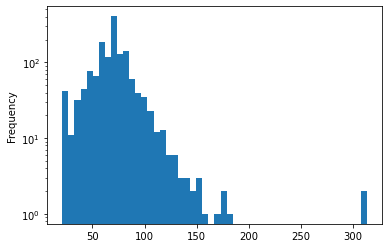

LotArea


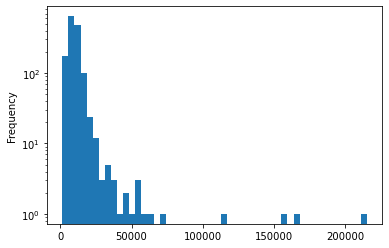

OverallQual


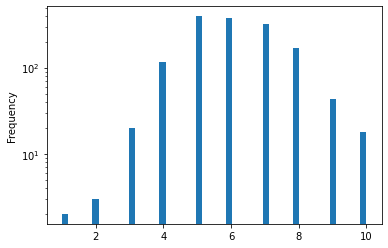

MasVnrArea


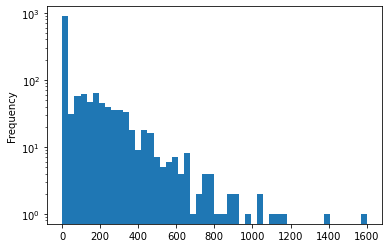

TotalBsmtSF


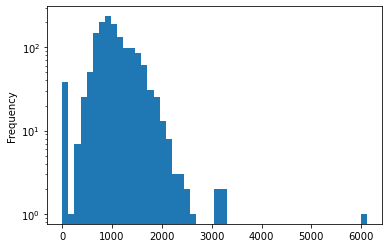

GrLivArea


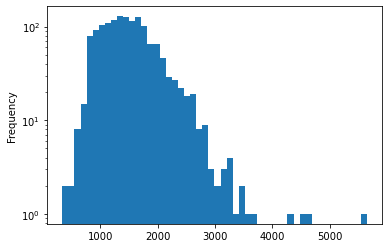

BsmtFullBath


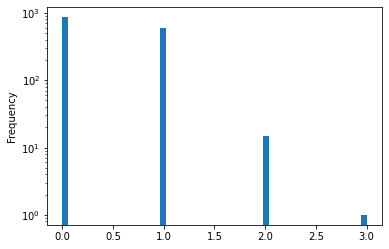

FullBath


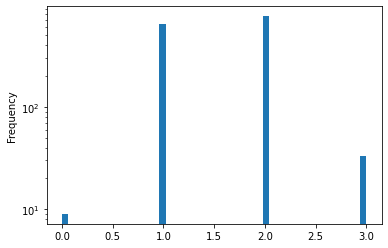

Fireplaces


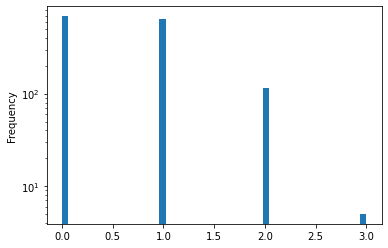

GarageCars


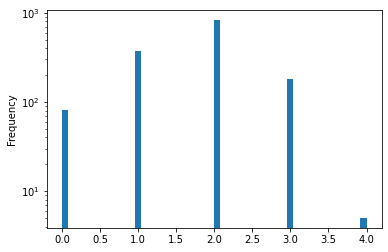

WoodDeckSF


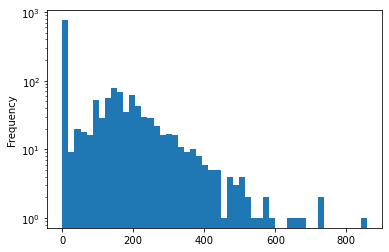

OpenPorchSF


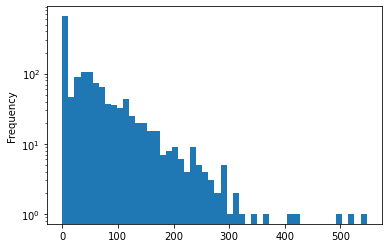

EnclosedPorch


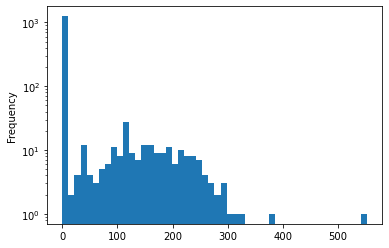

3SsnPorch


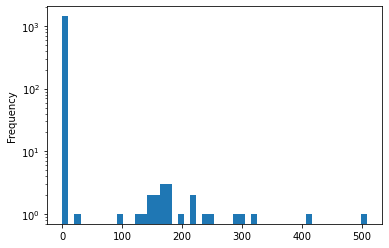

ScreenPorch


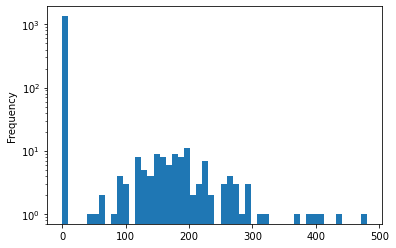

PoolArea


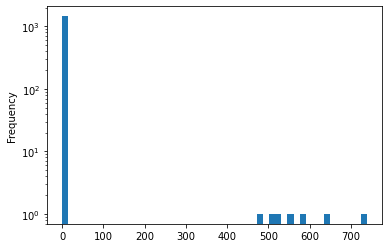

SalePrice


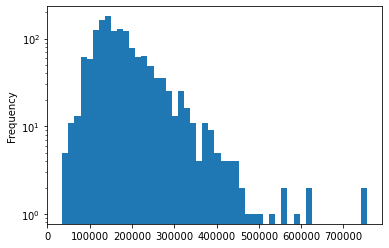

In [19]:
#Histogram to Check for Skew
for col in num_columns:
    print(col)
    train[col].plot.hist(bins = 50, log= True) 
    plt.show()

In [20]:
#Correcting for Skew
train_number['LotArea'] = np.log1p(train_number['LotArea'])
train_number['EnclosedPorch'] = np.log1p(train_number['EnclosedPorch'])
train_number['3SsnPorch'] = np.log1p(train_number['3SsnPorch'])
train_number['ScreenPorch'] = np.log1p(train_number['ScreenPorch'])
train_number['PoolArea'] = np.log1p(train_number['PoolArea'])

train_number['LotFrontage'] = np.log1p(train_number['LotFrontage'])
train_number['MasVnrArea'] = np.log1p(train_number['MasVnrArea'])
train_number['TotalBsmtSF'] = np.log1p(train_number['TotalBsmtSF'])
train_number['WoodDeckSF'] = np.log1p(train_number['WoodDeckSF'])
train_number['OpenPorchSF'] = np.log1p(train_number['OpenPorchSF'])

train_number['SalePrice'] = np.log1p(train_number['SalePrice'])

In [22]:
#Table with only objects
train_object= train.drop(['SalePrice','OverallQual','GrLivArea','GarageCars','TotalBsmtSF','FullBath','MasVnrArea','Fireplaces','LotFrontage','WoodDeckSF','OpenPorchSF','LotArea','BsmtFullBath','ScreenPorch','PoolArea','3SsnPorch','EnclosedPorch'],axis=1)
train_object

,MSZoning,LotShape,Neighborhood,HouseStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,Foundation,Heating,CentralAir,Electrical,KitchenQual,GarageQual,SaleType,SaleCondition
0,RL,Reg,CollgCr,2Story,CompShg,VinylSd,VinylSd,Gd,PConc,GasA,Y,SBrkr,Gd,TA,WD,Normal
1,RL,Reg,Veenker,1Story,CompShg,MetalSd,MetalSd,TA,CBlock,GasA,Y,SBrkr,TA,TA,WD,Normal
2,RL,IR1,CollgCr,2Story,CompShg,VinylSd,VinylSd,Gd,PConc,GasA,Y,SBrkr,Gd,TA,WD,Normal
3,RL,IR1,Crawfor,2Story,CompShg,Wd Sdng,Wd Shng,TA,BrkTil,GasA,Y,SBrkr,Gd,TA,WD,Abnorml
4,RL,IR1,NoRidge,2Story,CompShg,VinylSd,VinylSd,Gd,PConc,GasA,Y,SBrkr,Gd,TA,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Reg,Gilbert,2Story,CompShg,VinylSd,VinylSd,TA,PConc,GasA,Y,SBrkr,TA,TA,WD,Normal
1456,RL,Reg,NWAmes,1Story,CompShg,Plywood,Plywood,TA,CBlock,GasA,Y,SBrkr,TA,TA,WD,Normal
1457,RL,Reg,Crawfor,2Story,CompShg,CemntBd,CmentBd,Ex,Stone,GasA,Y,SBrkr,Gd,TA,WD,Normal
1458,RL,Reg,NAmes,1Story,CompShg,MetalSd,MetalSd,TA,CBlock,GasA,Y,FuseA,Gd,TA,WD,Normal


In [23]:
#Encoding Categorical Variables
train_object_encode=pd.get_dummies(train_object)
train_object_encode

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,Neighborhood_Blmngtn,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,1,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,0,0,0,1,0,1,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
4,0,0,0,1,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0,0,0,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
1456,0,0,0,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
1457,0,0,0,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
1458,0,0,0,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0


In [24]:
#Rejoing the number/object tables
full_train = [train_object_encode,train_number]

In [25]:
#Concat the number/object tables
full_train = pd.concat(full_train,axis=1)
full_train.shape

(1460, 145)

In [26]:
#Split DataFrame

f_train = full_train.loc[:,full_train.columns != 'SalePrice']
f_train_target = full_train.loc[:,full_train.columns == 'SalePrice']

In [27]:
#Standard Scaler

scaler = StandardScaler()

f_train = scaler.fit_transform(f_train)

In [28]:
#Find out alpha to use with Lasso


lasso = Lasso()
grs_train = GridSearchCV(estimator = lasso, 
                        param_grid = {"alpha": [0.000001,0.00001,0.0001,0.001,0.01,0.1,1.0,10.0,100,1000,10000,100000 ]}, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = 5)

grs_train.fit(f_train, f_train_target)

/Users/ernestomadrigal/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.27104033589507104, tolerance: 0.018912592760396085
  model = cd_fast.enet_coordinate_descent(
/Users/ernestomadrigal/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.6993389272972728, tolerance: 0.018002191385488822
  model = cd_fast.enet_coordinate_descent(
/Users/ernestomadrigal/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.2436060702995206, tolerance: 0.018373605848561597
  model = cd_fast.enet_coordinate_descent(
/Users/ernestomadrigal/opt/ana

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1.0,
                                   10.0, 100, 1000, 10000, 100000]},
             scoring='neg_mean_absolute_error')

In [30]:
#checking the value of optimum number of parameters

print(grs_train.best_estimator_)

Lasso(alpha=0.001)


In [31]:
lasso = Lasso(alpha=0.001)
lasso.fit(f_train, f_train_target)

Lasso(alpha=0.001)

In [33]:
#R^2 prediction of train - evaluate performance of lasso model

f_train_predict = lasso.predict(f_train)

print(metrics.r2_score(y_true=f_train_target, y_pred=f_train_predict))

0.9098174884640042


# Test Data

In [34]:
#Create Train Dataframe
col_list = ["LotFrontage","GarageQual","MasVnrArea","Electrical","Id","LotArea","OverallQual","TotalBsmtSF","GrLivArea","BsmtFullBath","FullBath","Fireplaces","GarageCars","WoodDeckSF","OpenPorchSF","EnclosedPorch","3SsnPorch","ScreenPorch","PoolArea","MSZoning","LotShape","Neighborhood","HouseStyle","RoofMatl","Exterior1st","Exterior2nd","ExterQual","Foundation","SaleCondition","SaleType","Heating","CentralAir","KitchenQual"]
missing_values = ["n/a", "na", "--", "nan"]
test = pd.read_csv('test.csv', usecols=col_list,low_memory=False, delimiter =',', na_values = missing_values)

In [35]:
#Train table
test

,Id,MSZoning,LotFrontage,LotArea,LotShape,Neighborhood,HouseStyle,OverallQual,RoofMatl,Exterior1st,...,GarageCars,GarageQual,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,SaleType,SaleCondition
0,1461,RH,80.0,11622,Reg,NAmes,1Story,5,CompShg,VinylSd,...,1.0,TA,140,0,0,0,120,0,WD,Normal
1,1462,RL,81.0,14267,IR1,NAmes,1Story,6,CompShg,Wd Sdng,...,1.0,TA,393,36,0,0,0,0,WD,Normal
2,1463,RL,74.0,13830,IR1,Gilbert,2Story,5,CompShg,VinylSd,...,2.0,TA,212,34,0,0,0,0,WD,Normal
3,1464,RL,78.0,9978,IR1,Gilbert,2Story,6,CompShg,VinylSd,...,2.0,TA,360,36,0,0,0,0,WD,Normal
4,1465,RL,43.0,5005,IR1,StoneBr,1Story,8,CompShg,HdBoard,...,2.0,TA,0,82,0,0,144,0,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,RM,21.0,1936,Reg,MeadowV,2Story,4,CompShg,CemntBd,...,0.0,NaN,0,0,0,0,0,0,WD,Normal
1455,2916,RM,21.0,1894,Reg,MeadowV,2Story,4,CompShg,CemntBd,...,1.0,TA,0,24,0,0,0,0,WD,Abnorml
1456,2917,RL,160.0,20000,Reg,Mitchel,1Story,5,CompShg,VinylSd,...,2.0,TA,474,0,0,0,0,0,WD,Abnorml
1457,2918,RL,62.0,10441,Reg,Mitchel,SFoyer,5,CompShg,HdBoard,...,0.0,NaN,80,32,0,0,0,0,WD,Normal


In [36]:
#Train Info
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 33 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSZoning       1455 non-null   object 
 2   LotFrontage    1232 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   LotShape       1459 non-null   object 
 5   Neighborhood   1459 non-null   object 
 6   HouseStyle     1459 non-null   object 
 7   OverallQual    1459 non-null   int64  
 8   RoofMatl       1459 non-null   object 
 9   Exterior1st    1458 non-null   object 
 10  Exterior2nd    1458 non-null   object 
 11  MasVnrArea     1444 non-null   float64
 12  ExterQual      1459 non-null   object 
 13  Foundation     1459 non-null   object 
 14  TotalBsmtSF    1458 non-null   float64
 15  Heating        1459 non-null   object 
 16  CentralAir     1459 non-null   object 
 17  Electrical     1459 non-null   object 
 18  GrLivAre

In [37]:
#Null Information
null_sum = test.isnull().sum()
total = null_sum.sort_values(ascending=False)
total

LotFrontage      227
GarageQual        78
MasVnrArea        15
MSZoning           4
BsmtFullBath       2
GarageCars         1
KitchenQual        1
SaleType           1
Exterior2nd        1
Exterior1st        1
TotalBsmtSF        1
OverallQual        0
RoofMatl           0
ExterQual          0
HouseStyle         0
Neighborhood       0
LotShape           0
LotArea            0
SaleCondition      0
CentralAir         0
Foundation         0
Heating            0
Electrical         0
GrLivArea          0
FullBath           0
Fireplaces         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
Id                 0
dtype: int64

In [38]:
#Null Values Left
test.isnull().any().value_counts()

False    22
True     11
dtype: int64

In [39]:
#Numerical Missing Data

test['MasVnrArea'] = test['MasVnrArea'].fillna(test['MasVnrArea'].median())
test['LotFrontage'] = test['LotFrontage'].fillna(test['LotFrontage'].median())

test['BsmtFullBath'] = test['BsmtFullBath'].fillna(test['BsmtFullBath'].median())
test['GarageCars'] = test['GarageCars'].fillna(test['GarageCars'].median())
test['TotalBsmtSF'] = test['TotalBsmtSF'].fillna(test['TotalBsmtSF'].median())

In [40]:
#Categorical Missing Data


mfce=test['Electrical'].mode()[0]
mfcg=test['GarageQual'].mode()[0]

mfcs=test['MSZoning'].mode()[0]
mfck=test['KitchenQual'].mode()[0]
mfct=test['SaleType'].mode()[0]
mfc2=test['Exterior2nd'].mode()[0]
mfc1=test['Exterior1st'].mode()[0]

test['Electrical'].fillna(mfce,inplace=True)
test['GarageQual'].fillna(mfcg,inplace=True)

test['MSZoning'].fillna(mfcs,inplace=True)
test['KitchenQual'].fillna(mfck,inplace=True)
test['SaleType'].fillna(mfct,inplace=True)
test['Exterior2nd'].fillna(mfc2,inplace=True)
test['Exterior1st'].fillna(mfc1,inplace=True)

In [41]:
#Null Values Left
test.isnull().any().value_counts()

False    33
dtype: int64

In [42]:
#Test Info
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 33 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSZoning       1459 non-null   object 
 2   LotFrontage    1459 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   LotShape       1459 non-null   object 
 5   Neighborhood   1459 non-null   object 
 6   HouseStyle     1459 non-null   object 
 7   OverallQual    1459 non-null   int64  
 8   RoofMatl       1459 non-null   object 
 9   Exterior1st    1459 non-null   object 
 10  Exterior2nd    1459 non-null   object 
 11  MasVnrArea     1459 non-null   float64
 12  ExterQual      1459 non-null   object 
 13  Foundation     1459 non-null   object 
 14  TotalBsmtSF    1459 non-null   float64
 15  Heating        1459 non-null   object 
 16  CentralAir     1459 non-null   object 
 17  Electrical     1459 non-null   object 
 18  GrLivAre

In [43]:
#Drop 'Id' column
Id = test['Id']
test.drop(['Id'],1,inplace=True)

In [44]:
#Table with only numbers
test_number = test.drop(['MSZoning','LotShape','Neighborhood','HouseStyle','RoofMatl','Exterior1st','Exterior2nd','ExterQual','Foundation','Heating','CentralAir','Electrical','KitchenQual','GarageQual','SaleType','SaleCondition'],axis=1)
test_number

,LotFrontage,LotArea,OverallQual,MasVnrArea,TotalBsmtSF,GrLivArea,BsmtFullBath,FullBath,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea
0,80.0,11622,5,0.0,882.0,896,0.0,1,0,1.0,140,0,0,0,120,0
1,81.0,14267,6,108.0,1329.0,1329,0.0,1,0,1.0,393,36,0,0,0,0
2,74.0,13830,5,0.0,928.0,1629,0.0,2,1,2.0,212,34,0,0,0,0
3,78.0,9978,6,20.0,926.0,1604,0.0,2,1,2.0,360,36,0,0,0,0
4,43.0,5005,8,0.0,1280.0,1280,0.0,2,0,2.0,0,82,0,0,144,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,21.0,1936,4,0.0,546.0,1092,0.0,1,0,0.0,0,0,0,0,0,0
1455,21.0,1894,4,0.0,546.0,1092,0.0,1,0,1.0,0,24,0,0,0,0
1456,160.0,20000,5,0.0,1224.0,1224,1.0,1,1,2.0,474,0,0,0,0,0
1457,62.0,10441,5,0.0,912.0,970,0.0,1,0,0.0,80,32,0,0,0,0


In [45]:
#Correcting for Skew

test_number['LotArea'] = np.log1p(test_number['LotArea'])
test_number['EnclosedPorch'] = np.log1p(test_number['EnclosedPorch'])
test_number['3SsnPorch'] = np.log1p(test_number['3SsnPorch'])
test_number['ScreenPorch'] = np.log1p(test_number['ScreenPorch'])
test_number['PoolArea'] = np.log1p(test_number['PoolArea'])

test_number['LotFrontage'] = np.log1p(test_number['LotFrontage'])
test_number['MasVnrArea'] = np.log1p(test_number['MasVnrArea'])
test_number['TotalBsmtSF'] = np.log1p(test_number['TotalBsmtSF'])
test_number['WoodDeckSF'] = np.log1p(test_number['WoodDeckSF'])
test_number['OpenPorchSF'] = np.log1p(test_number['OpenPorchSF'])

In [46]:
#Table with only objects
test_object= test.drop(['OverallQual','GrLivArea','GarageCars','TotalBsmtSF','FullBath','MasVnrArea','Fireplaces','LotFrontage','WoodDeckSF','OpenPorchSF','LotArea','BsmtFullBath','ScreenPorch','PoolArea','3SsnPorch','EnclosedPorch'],axis=1)
test_object

,MSZoning,LotShape,Neighborhood,HouseStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,Foundation,Heating,CentralAir,Electrical,KitchenQual,GarageQual,SaleType,SaleCondition
0,RH,Reg,NAmes,1Story,CompShg,VinylSd,VinylSd,TA,CBlock,GasA,Y,SBrkr,TA,TA,WD,Normal
1,RL,IR1,NAmes,1Story,CompShg,Wd Sdng,Wd Sdng,TA,CBlock,GasA,Y,SBrkr,Gd,TA,WD,Normal
2,RL,IR1,Gilbert,2Story,CompShg,VinylSd,VinylSd,TA,PConc,GasA,Y,SBrkr,TA,TA,WD,Normal
3,RL,IR1,Gilbert,2Story,CompShg,VinylSd,VinylSd,TA,PConc,GasA,Y,SBrkr,Gd,TA,WD,Normal
4,RL,IR1,StoneBr,1Story,CompShg,HdBoard,HdBoard,Gd,PConc,GasA,Y,SBrkr,Gd,TA,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,RM,Reg,MeadowV,2Story,CompShg,CemntBd,CmentBd,TA,CBlock,GasA,Y,SBrkr,TA,TA,WD,Normal
1455,RM,Reg,MeadowV,2Story,CompShg,CemntBd,CmentBd,TA,CBlock,GasA,Y,SBrkr,TA,TA,WD,Abnorml
1456,RL,Reg,Mitchel,1Story,CompShg,VinylSd,VinylSd,TA,CBlock,GasA,Y,SBrkr,TA,TA,WD,Abnorml
1457,RL,Reg,Mitchel,SFoyer,CompShg,HdBoard,Wd Shng,TA,PConc,GasA,Y,SBrkr,TA,TA,WD,Normal


In [47]:
#Encoding Categorical Variables 

test_object_encode=pd.get_dummies(test_object)
test_object_encode

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,Neighborhood_Blmngtn,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,1,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,1,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,0,0,0,1,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,0,0,0,1,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,0,0,0,0,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
1455,0,0,0,0,1,0,0,0,1,0,...,0,0,0,1,1,0,0,0,0,0
1456,0,0,0,1,0,0,0,0,1,0,...,0,0,0,1,1,0,0,0,0,0
1457,0,0,0,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0


In [48]:
#Find the missing columns and set to 0
#Reset columns to match in both dataframes

missing_columns = set(train_object_encode.columns ) - set(test_object_encode.columns )
for col in missing_columns:
    test_object_encode[col] = 0
test_object_encode= test_object_encode[train_object_encode.columns]

In [49]:
full_test = [test_object_encode,test_number]

In [50]:
full_test = pd.concat(full_test,axis=1)
full_test.shape

(1459, 144)

In [51]:
f_test = full_test

In [52]:
#Standard Scaler
scaler = StandardScaler()

f_test = scaler.fit_transform(f_test)

# Lasso Regression Prediction

In [53]:
#Lasso prediction using predetermined alpha

from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.001)
lasso.fit(f_train, f_train_target)
predictions_test=np.exp(lasso.predict(f_test))



price_table = pd.DataFrame({"Id" : Id,"SalePrice": predictions_test})

In [55]:
#Updating SalePrice Type and Saving
price_table.SalePrice=price_table.SalePrice.astype(int)
price_table.to_csv('price_prediction_table.csv', index=False)

In [56]:
price_table

,Id,SalePrice
0,1461,129890
1,1462,156974
2,1463,170337
3,1464,186712
4,1465,212014
...,...,...
1454,2915,81301
1455,2916,79717
1456,2917,151977
1457,2918,115449


In [57]:
price_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Id         1459 non-null   int64
 1   SalePrice  1459 non-null   int64
dtypes: int64(2)
memory usage: 22.9 KB


# Variance Validation

In [58]:
#Create DataFrame with Correct Prices
test_actual_price = pd.read_csv('test_actual_price.csv',low_memory=False, delimiter =',')
test_actual_price

,Id,SalePrice
0,1975,615000
1,1664,610000
2,2264,591587
3,2683,584500
4,1678,552000
...,...,...
1454,1916,57625
1455,1946,115000
1456,2217,13100
1457,2251,103000


In [59]:
test_actual_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Id         1459 non-null   int64
 1   SalePrice  1459 non-null   int64
dtypes: int64(2)
memory usage: 22.9 KB


In [60]:
#Rename Sales Price Columns
price_table.rename(columns = {'SalePrice':'SalePriceLasso'}, inplace = True) 
test_actual_price.rename(columns = {'SalePrice':'SalePriceActual'}, inplace = True) 

In [61]:
test_merge=pd.merge(price_table,test_actual_price, on='Id')
test_merge['Difference']=(test_merge['SalePriceActual']-test_merge['SalePriceLasso'])
test_merge['AbsDifference']=(test_merge['SalePriceActual']-test_merge['SalePriceLasso']).abs()
test_merge['% Difference']=(test_merge['SalePriceActual']-test_merge['SalePriceLasso'])/test_merge['SalePriceActual']
test_merge['% Difference'] = pd.Series(["{0:.2f}%".format(val * 100) for val in test_merge['% Difference']], index = test_merge.index)
test_merge.set_index('Id')

,SalePriceLasso,SalePriceActual,Difference,AbsDifference,% Difference
Id,,,,,
1461,129890,105000,-24890,24890,-23.70%
1462,156974,172000,15026,15026,8.74%
1463,170337,189900,19563,19563,10.30%
1464,186712,195500,8788,8788,4.50%
1465,212014,191500,-20514,20514,-10.71%
...,...,...,...,...,...
2915,81301,90500,9199,9199,10.16%
2916,79717,71000,-8717,8717,-12.28%
2917,151977,131000,-20977,20977,-16.01%


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb6b6e6d2b0>,
      dtype=object)

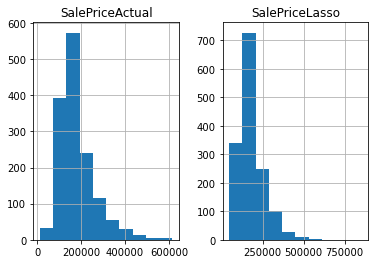

In [62]:
test_merge.hist(column=['SalePriceActual','SalePriceLasso'],bins=10)

In [63]:
import pandas as pd

p = pd.read_csv('price_prediction_table.csv')
o = pd.read_csv('test_actual_price.csv')
eva = pd.merge(p, o, on='Id', how='inner', suffixes=['_pred', '_actual'])
mape = np.mean(np.abs(eva['SalePrice_actual'] - eva['SalePrice_pred']) / eva['SalePrice_actual'])
print(mape)


0.10109547919574584
